In [12]:
import geopandas as gp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import datetime as dt

from pandas.tseries.offsets import DateOffset

In [2]:
filename = 'NASA/POWER_Point_Monthly_Timeseries_1981_2020_048d4093N_123d5716W_LST.json'

df = gp.read_file(filename)

Idict = df['parameter'][0]
Idf =  pd.DataFrame.from_dict(Idict)

pd_df = pd.DataFrame(Idf)
#type(s_index)
pd_df.head()

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX
198401,0.43,71.46,0.66,2.80,-999.0,-999.0,0.23,-999.0,1.20,1.85,-999.0,-999.0,-999.0,-999
198402,0.39,82.41,0.69,4.35,-999.0,-999.0,0.23,-999.0,1.71,2.99,-999.0,-999.0,-999.0,-999
198403,0.47,76.16,0.72,6.63,-999.0,-999.0,0.21,-999.0,3.13,4.76,-999.0,-999.0,-999.0,-999
198404,0.48,77.63,0.74,8.97,-999.0,-999.0,0.16,-999.0,4.30,6.69,-999.0,-999.0,-999.0,-999
198405,0.48,75.46,0.73,10.75,-999.0,-999.0,0.25,-999.0,5.23,7.82,-999.0,-999.0,-999.0,-999


In [3]:
multidf = pd.DataFrame(pd_df[['ALLSKY_KT', 'CLOUD_AMT', 'CLRSKY_KT', 'TOA_SW_DWN']])
multidf.head()

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN
198401,0.43,71.46,0.66,2.80
198402,0.39,82.41,0.69,4.35
198403,0.47,76.16,0.72,6.63
198404,0.48,77.63,0.74,8.97
198405,0.48,75.46,0.73,10.75


In [4]:
'''do not do this step more than once i swear to all things evil'''

multidf = multidf.drop(multidf.index[12::13])

In [5]:
def append(dfseries):
    dfseries = dfseries[:4] + '-' + dfseries[4:]
    return dfseries

multidf['ds']= multidf.index
multidf['ds']= multidf['ds'].astype(str)
multidf['ds'] = multidf['ds'].apply(append)

multidf = multidf.set_index('ds')
multidf.head()

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN
ds,,,,
1984-01,0.43,71.46,0.66,2.80
1984-02,0.39,82.41,0.69,4.35
1984-03,0.47,76.16,0.72,6.63
1984-04,0.48,77.63,0.74,8.97
1984-05,0.48,75.46,0.73,10.75


In [6]:
# change the index to DateTime

multidf.index = pd.to_datetime(multidf.index)
multidf

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN
ds,,,,
1984-01-01,0.43,71.46,0.66,2.80
1984-02-01,0.39,82.41,0.69,4.35
1984-03-01,0.47,76.16,0.72,6.63
1984-04-01,0.48,77.63,0.74,8.97
1984-05-01,0.48,75.46,0.73,10.75
...,...,...,...,...
2020-08-01,0.62,38.09,0.73,9.52
2020-09-01,0.52,47.92,0.63,7.34
2020-10-01,0.45,68.50,0.68,5.01


In [7]:
# run the model with one exog variable as the endog variable

x = multidf['CLOUD_AMT']

model = SARIMAX(x, order = (6,0,3), seasonal_order = (1,0,1,12))
model_fit = model.fit(disp = False)

/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/cbenstead

In [8]:
# summary of model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            CLOUD_AMT   No. Observations:                  444
Model:             SARIMAX(6, 0, 3)x(1, 0, [1], 12)   Log Likelihood               -1617.720
Date:                              Tue, 08 Mar 2022   AIC                           3259.441
Time:                                      00:21:37   BIC                           3308.591
Sample:                                  01-01-1984   HQIC                          3278.823
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5118      0.182     -2.812      0.005      -0.869      -0.155
ar.L2          1.0067      0.093     10.817      0.000       0.824       1.189
ar.L3          0.5956      0.192      3.101      0.002       0.219       0.972
ar.L4         -0.2208      0.080     -2.759      0.006      -0.378      -0.064
ar.L5          0.0137      0.053      0.261      0.794      -0.089       0.117
ar.L6          0.1132      0.050      2.258      0.024       0.015       0.212
ma.L1          0.6599      0.184      3.592      0.000       0.300       1.020
ma.L2         -0.8720      0.071    -12.218      0.000      -1.012      -0.732
ma.L3         -0.7208      0.183     -3.936      0.000      -1.080      -0.362
ar.S.L12       0.9950      0.005    199.510      0.000       0.985       1.005
ma.S.L12      -0.8752      0.035    -24.765      0.000      -0.945      -0.806
sigma2        80.0215      5.434     14.727      0.000      69.372      90.671
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.79
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.40
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
multidf['forecast'] = model_fit.predict(start=380, end=443)

<AxesSubplot:xlabel='ds'>

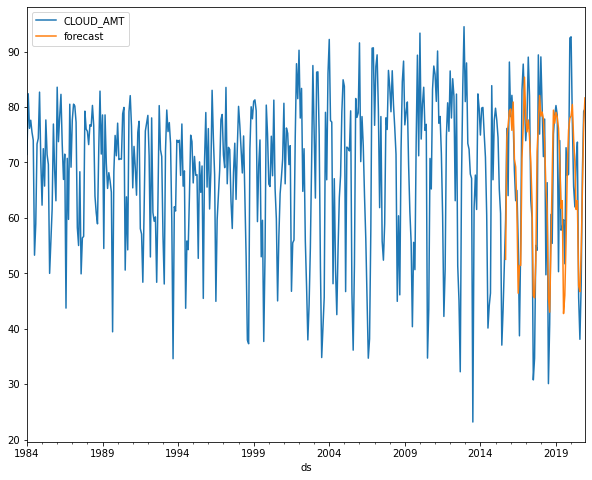

In [11]:
multidf[['CLOUD_AMT', 'forecast']].plot(figsize=(10,8))

In [14]:
# Create a df for storing predicted values, predicting 10 years out
pred_date=[multidf.index[-1]+ DateOffset(months=x)for x in range(0,120)]

pred_date = pd.DataFrame(index=pred_date[1:],columns=multidf.columns)
pred_date

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,forecast
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2030-07-01,NaN,NaN,NaN,NaN,NaN
2030-08-01,NaN,NaN,NaN,NaN,NaN
2030-09-01,NaN,NaN,NaN,NaN,NaN
2030-10-01,NaN,NaN,NaN,NaN,NaN


In [15]:
# Concatenate to original df

data=pd.concat([multidf,pred_date])

<AxesSubplot:>

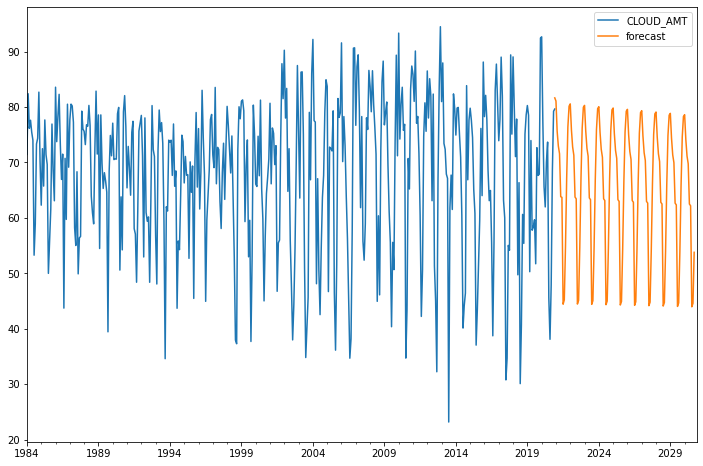

In [16]:
# forecast for CLOUD_AMT

data['forecast'] = model_fit.predict(start = 443, end = 560)  
data[['CLOUD_AMT', 'forecast']].plot(figsize=(12, 8))

## Trying with walk-forward validation

In [17]:
file = 'NASA/POWER_Point_Monthly_Timeseries_1981_2020_048d4093N_123d5716W_LST.json'

dataframe = gp.read_file(file)

Idict = dataframe['parameter'][0]
Idf =  pd.DataFrame.from_dict(Idict)

pandas = pd.DataFrame(Idf)

pandas.head()

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX
198401,0.43,71.46,0.66,2.80,-999.0,-999.0,0.23,-999.0,1.20,1.85,-999.0,-999.0,-999.0,-999
198402,0.39,82.41,0.69,4.35,-999.0,-999.0,0.23,-999.0,1.71,2.99,-999.0,-999.0,-999.0,-999
198403,0.47,76.16,0.72,6.63,-999.0,-999.0,0.21,-999.0,3.13,4.76,-999.0,-999.0,-999.0,-999
198404,0.48,77.63,0.74,8.97,-999.0,-999.0,0.16,-999.0,4.30,6.69,-999.0,-999.0,-999.0,-999
198405,0.48,75.46,0.73,10.75,-999.0,-999.0,0.25,-999.0,5.23,7.82,-999.0,-999.0,-999.0,-999


In [18]:
# select only the endog and exog variables, and re-index with datetime

exogdf = pd.DataFrame(pandas[['ALLSKY_KT', 'CLOUD_AMT', 'CLRSKY_KT', 'TOA_SW_DWN']])

In [20]:
'''do not do this step more than once i swear to all things evil'''

exogdf = exogdf.drop(exogdf.index[12::13])

In [22]:
def append(dfseries):
    dfseries = dfseries[:4] + '-' + dfseries[4:]
    return dfseries

exogdf['ds']= exogdf.index
exogdf['ds']= exogdf['ds'].astype(str)
exogdf['ds'] = exogdf['ds'].apply(append)

exogdf = exogdf.set_index('ds')

In [23]:
exogdf.index = pd.to_datetime(exogdf.index)
exogdf

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN
ds,,,,
1984-01-01,0.43,71.46,0.66,2.80
1984-02-01,0.39,82.41,0.69,4.35
1984-03-01,0.47,76.16,0.72,6.63
1984-04-01,0.48,77.63,0.74,8.97
1984-05-01,0.48,75.46,0.73,10.75
...,...,...,...,...
2020-08-01,0.62,38.09,0.73,9.52
2020-09-01,0.52,47.92,0.63,7.34
2020-10-01,0.45,68.50,0.68,5.01


In [39]:
# Selecting just one variable to study

cloud = pd.DataFrame(exogdf['CLOUD_AMT'])
cloud

,CLOUD_AMT
ds,
1984-01-01,71.46
1984-02-01,82.41
1984-03-01,76.16
1984-04-01,77.63
1984-05-01,75.46
...,...
2020-08-01,38.09
2020-09-01,47.92
2020-10-01,68.50


### Split Dataset

In [35]:
# removing the very last part of the dataset as a test set (pretend out-of-sample values)

split_point = len(cloud) - 24
dataset, validation = cloud[0:split_point], cloud[split_point:]
print('Dataset %d, Validation %' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)


Dataset 420, Validation 24


In [36]:
# create a differenced series
# this makes the data stationary by subtracting the same month from the previous year's value from the current year,
#accounting for seasonality

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

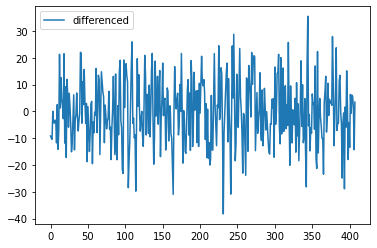

In [67]:
# This is what the differenced data looks like

plt.plot(differenced, label='differenced')
plt.legend()

In [37]:
# invert differenced value (to be used later for forecasting)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [126]:
# load dataset
series = pd.read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
months_in_year = 12
differenced = difference(X, months_in_year)
# fit model
mod = SARIMAX(differenced, order=(6,0,3), seasonal_order=(1,0,1,12))
mod_fit = mod.fit(disp=False)
# print summary of fit model
mod_fit.summary()

/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  408
Model:             SARIMAX(6, 0, 3)x(1, 0, [1], 12)   Log Likelihood               -1476.443
Date:                              Tue, 08 Mar 2022   AIC                           2976.885
Time:                                      10:10:11   BIC                           3025.020
Sample:                                           0   HQIC                          2995.932
                                              - 408                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5393      0.758      0.712      0.477      -0.946       2.025
ar.L2          0.0003      0.999      0.000      1.000      -1.958       1.959
ar.L3         -0.7478      0.781     -0.957      0.339      -2.279       0.784
ar.L4          0.0588      0.082      0.720      0.471      -0.101       0.219
ar.L5          0.0084      0.062      0.136      0.892      -0.114       0.131
ar.L6         -0.0646      0.054     -1.187      0.235      -0.171       0.042
ma.L1         -0.4514      0.754     -0.599      0.549      -1.929       1.026
ma.L2         -0.0044      0.928     -0.005      0.996      -1.822       1.814
ma.L3          0.7279      0.715      1.018      0.309      -0.673       2.129
ar.S.L12      -0.0247      0.069     -0.355      0.722      -0.161       0.111
ma.S.L12      -0.8335      0.042    -19.619      0.000      -0.917      -0.750
sigma2        79.4135      5.814     13.658      0.000      68.018      90.809
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 7.48
Prob(Q):                              0.89   Prob(JB):                         0.02
Heteroskedasticity (H):               1.20   Skew:                            -0.33
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
# multi-step out-of-sample forecast
forecast = mod_fit.forecast(steps=24)

# invert the differenced forecast to something usable
predict = []
history = [x for x in X]
month = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, months_in_year)
    #print('month %d: %f' % (month, inverted))
    history.append(inverted)
    month += 1
    predict.append(inverted)

In [128]:
# find error?
print(predict)
#validation

[array([79.51106727]), array([77.44724633]), array([79.93892189]), array([77.04509586]), array([66.60003667]), array([64.39484984]), array([40.28717996]), array([42.75475114]), array([52.93898175]), array([68.08981289]), array([80.69269483]), array([82.72839125]), array([82.2596342]), array([78.36761534]), array([78.23485744]), array([73.85574378]), array([63.66405118]), array([63.99223015]), array([41.94885874]), array([45.36543877]), array([54.82155139]), array([67.41970865]), array([78.64587367]), array([80.53211042])]


In [47]:
from sklearn.metrics import mean_squared_error

In [129]:
MSE = mean_squared_error(validation['CLOUD_AMT'], predict)
MSE

115.39565278034782

In [116]:
from sklearn.metrics import r2_score

In [130]:
r2 = r2_score(validation['CLOUD_AMT'], predict)
r2

0.3953304791560289

In [94]:
import matplotlib
from matplotlib import pyplot as plt

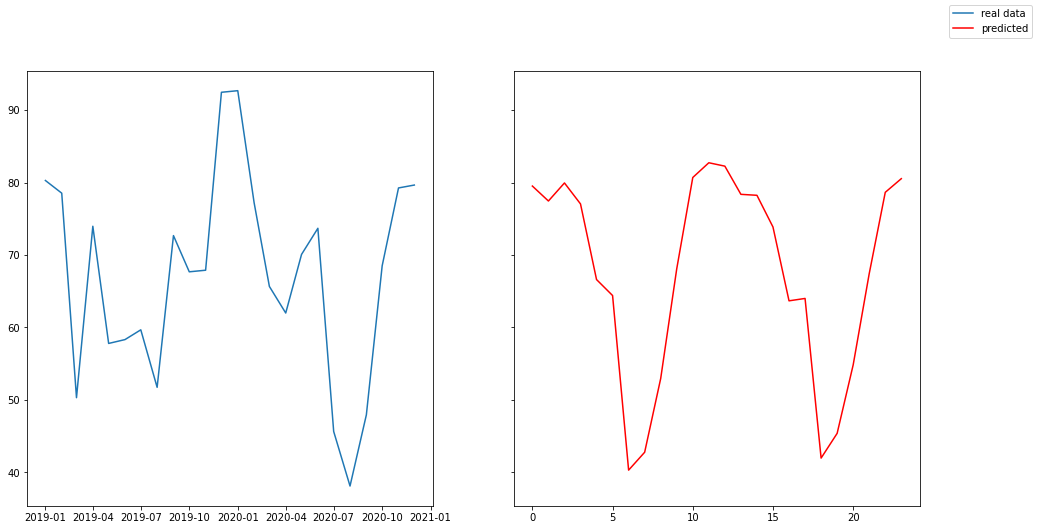

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey='row')

ax[0].plot(validation, label = 'real data')
ax[1].plot(predict, color='red', label = 'predicted')
fig.legend()


## Split Data with moving window thing

In [105]:
Z = cloud.values
n_train = 60
n_records = len(Z)
for i in range(n_train, n_records):
    train, test = Z[0:i], Z[i:i+60]
    print('train=%d, test=%d' % (len(train), len(test)))

train=60, test=60
train=61, test=60
train=62, test=60
train=63, test=60
train=64, test=60
train=65, test=60
train=66, test=60
train=67, test=60
train=68, test=60
train=69, test=60
train=70, test=60
train=71, test=60
train=72, test=60
train=73, test=60
train=74, test=60
train=75, test=60
train=76, test=60
train=77, test=60
train=78, test=60
train=79, test=60
train=80, test=60
train=81, test=60
train=82, test=60
train=83, test=60
train=84, test=60
train=85, test=60
train=86, test=60
train=87, test=60
train=88, test=60
train=89, test=60
train=90, test=60
train=91, test=60
train=92, test=60
train=93, test=60
train=94, test=60
train=95, test=60
train=96, test=60
train=97, test=60
train=98, test=60
train=99, test=60
train=100, test=60
train=101, test=60
train=102, test=60
train=103, test=60
train=104, test=60
train=105, test=60
train=106, test=60
train=107, test=60
train=108, test=60
train=109, test=60
train=110, test=60
train=111, test=60
train=112, test=60
train=113, test=60
train=114, tes

In [103]:
m = SARIMAX(train, order=(6,0,3))
fit = m.fit(disp=False)
# print summary of fit model
fit.summary()

/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  443
Model:               SARIMAX(6, 0, 3)   Log Likelihood               -1704.780
Date:                Tue, 08 Mar 2022   AIC                           3429.560
Time:                        01:42:52   BIC                           3470.495
Sample:                             0   HQIC                          3445.704
                                - 443                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1953      0.115     -1.693      0.090      -0.421       0.031
ar.L2          1.3982      0.070     19.915      0.000       1.261       1.536
ar.L3          0.1083      0.130      0.833      0.405      -0.147       0.363
ar.L4         -0.7499      0.095     -7.892      0.000      -0.936      -0.564
ar.L5          0.1052      0.047      2.241      0.025       0.013       0.197
ar.L6          0.3334      0.050      6.698      0.000       0.236       0.431
ma.L1          0.6995      0.114      6.117      0.000       0.475       0.924
ma.L2         -0.9458      0.030    -31.618      0.000      -1.004      -0.887
ma.L3         -0.7011      0.112     -6.236      0.000      -0.921      -0.481
sigma2       127.0517      8.772     14.483      0.000     109.858     144.245
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                13.23
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
holdup = pd.DataFrame(Idf)
holdup = pd.DataFrame(holdup[['ALLSKY_KT', 'CLOUD_AMT', 'CLRSKY_KT', 'TOA_SW_DWN']])
holdup

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN
198401,0.43,71.46,0.66,2.80
198402,0.39,82.41,0.69,4.35
198403,0.47,76.16,0.72,6.63
198404,0.48,77.63,0.74,8.97
198405,0.48,75.46,0.73,10.75
...,...,...,...,...
202009,0.52,47.92,0.63,7.34
202010,0.45,68.50,0.68,5.01
202011,0.37,79.25,0.66,3.17
202012,0.35,79.65,0.63,2.37
